# Lab 6

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/giswqs/geog-312/blob/main/book/labs/lab_06.ipynb)

## Overview

In this lab, you will practice handling multi-dimensional geospatial datasets using `Xarray` and `Rioxarray`. This includes working with NetCDF climate data and georeferenced raster datasets (GeoTIFF files). You will learn how to perform data selection, arithmetic operations, resampling, and reprojection, as well as saving your results back to disk.

By the end of this lab, you will have a better understanding of how to:

* Work with Xarray datasets (NetCDF format) and inspect geospatial raster data.
* Apply common data operations like slicing, resampling, and arithmetic analysis.
* Reproject, clip, mask, and resample raster datasets.
* Export processed data to various formats such as NetCDF and GeoTIFF.

## Exercise 1: Exploring the Sea Surface Temperature Dataset

1. **Load the sea surface temperature dataset** from the NetCDF file ([`sea_surface_temperature.nc`](https://github.com/opengeos/datasets/releases/download/netcdf/sea_surface_temperature.nc)).
2. **Inspect the `Dataset` object** and list all the available variables and dimensions in the dataset.
3. **Select the `sst` variable** (sea surface temperature).
4. **Print the attributes, dimensions, and coordinates** of the `sst` variable to understand the metadata.

This exercise allows you to practice selecting specific subsets of data and visualizing SST patterns over a specified period.

In [4]:
import xarray as xr
import numpy as np
import leafmap

In [5]:
netcdf = leafmap.download_file(
    "https://github.com/opengeos/datasets/releases/download/netcdf/sea_surface_temperature.nc",
    overwrite=True,
)

Downloading...
From: https://github.com/opengeos/datasets/releases/download/netcdf/sea_surface_temperature.nc
To: /home/zyang91/Desktop/intro-to-gis/lab/sea_surface_temperature.nc
100%|██████████| 149M/149M [00:04<00:00, 35.5MB/s] 


In [6]:
ds = xr.open_dataset(netcdf)
ds
# Available variables: sst
# Dimensions: (time: 1, lat: 180, lon: 360)

<xarray.Dataset> Size: 149MB
Dimensions:  (time: 72, lat: 360, lon: 720)
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 576B 2010-01-01 2010-02-01 ... 2015-12-01
Data variables:
    sst      (time, lat, lon) float64 149MB ...

In [7]:
sst = ds.sst
sst

<xarray.DataArray 'sst' (time: 72, lat: 360, lon: 720)> Size: 149MB
[18662400 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 576B 2010-01-01 2010-02-01 ... 2015-12-01
Attributes:
    long_name:      Sea Surface Temperature
    units:          degrees Celsius
    standard_name:  sea_surface_temperature
    valid_range:    [-2. 35.]

In [8]:
sst.dims

('time', 'lat', 'lon')

In [9]:
sst.attrs

{'long_name': 'Sea Surface Temperature',
 'units': 'degrees Celsius',
 'standard_name': 'sea_surface_temperature',
 'valid_range': array([-2., 35.])}

In [10]:
sst.coords

Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 576B 2010-01-01 2010-02-01 ... 2015-12-01

## Exercise 2: Data Selection and Indexing

1. **Select a subset of the `sst` data** for a specific time (`2010-07-01`) and latitude (`0.0`), which represents the Equator.
2. **Create a time slice** for the SST data between January and March 2010 for all latitudes and longitudes.
3. **Plot the time slice** as a line plot, showing the latitude-averaged SST over time.

This exercise allows you to practice selecting specific subsets of data and visualizing SST patterns over a specified period.

In [11]:
subset = sst.sel(time="2010-07-01", lat=0.0, method="nearest")
subset

<xarray.DataArray 'sst' (lon: 720)> Size: 6kB
[720 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
    lat      float64 8B 0.25
    time     datetime64[ns] 8B 2010-07-01
Attributes:
    long_name:      Sea Surface Temperature
    units:          degrees Celsius
    standard_name:  sea_surface_temperature
    valid_range:    [-2. 35.]

In [12]:
time_slice = sst.sel(time=slice("2010-01-01", "2010-03-31"))
time_slice

<xarray.DataArray 'sst' (time: 3, lat: 360, lon: 720)> Size: 6MB
[777600 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 24B 2010-01-01 2010-02-01 2010-03-01
Attributes:
    long_name:      Sea Surface Temperature
    units:          degrees Celsius
    standard_name:  sea_surface_temperature
    valid_range:    [-2. 35.]

In [13]:
import matplotlib.pyplot as plt

In [14]:
lat_average_sst = time_slice.mean(dim="lat")
lat_average_sst

<xarray.DataArray 'sst' (time: 3, lon: 720)> Size: 17kB
array([[284.91032774, 285.0140856 , 285.04051273, ..., 284.76449598,
        284.81292317, 284.81273036],
       [285.11668364, 285.21648616, 285.21997238, ..., 284.93981054,
        285.0179008 , 285.01373549],
       [285.35542036, 285.47567092, 285.50848415, ..., 285.18486566,
        285.26587217, 285.250077  ]], shape=(3, 720))
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 24B 2010-01-01 2010-02-01 2010-03-01

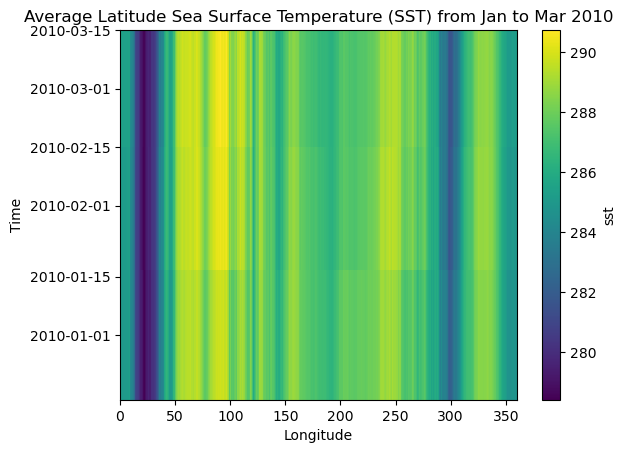

In [15]:
lat_average_sst.plot()
plt.title("Average Latitude Sea Surface Temperature (SST) from Jan to Mar 2010")
plt.xlabel("Longitude")
plt.ylabel("Time")
plt.show()

In [16]:
lat_averaged_sst = time_slice.mean(dim=["lat", "lon"])

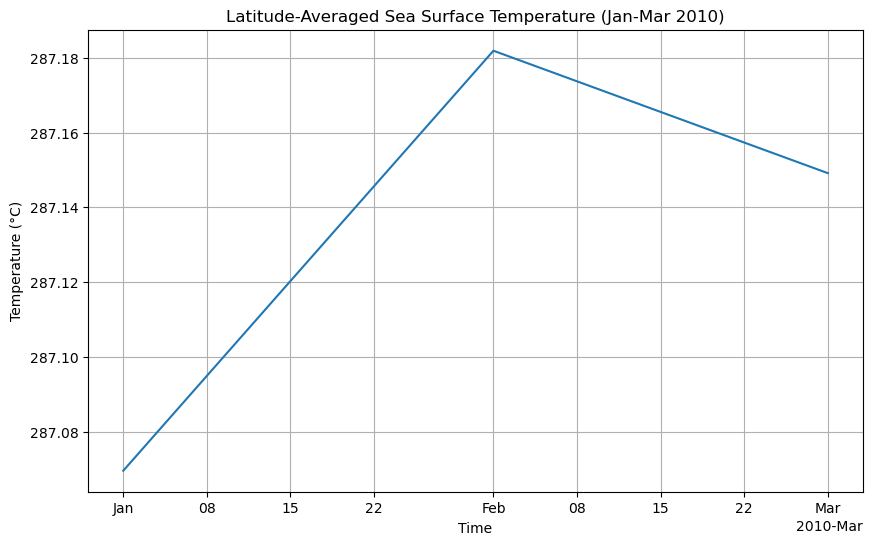

In [17]:
plt.figure(figsize=(10, 6))
lat_averaged_sst.plot()
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Latitude-Averaged Sea Surface Temperature (Jan-Mar 2010)")
plt.grid(True)
plt.show()

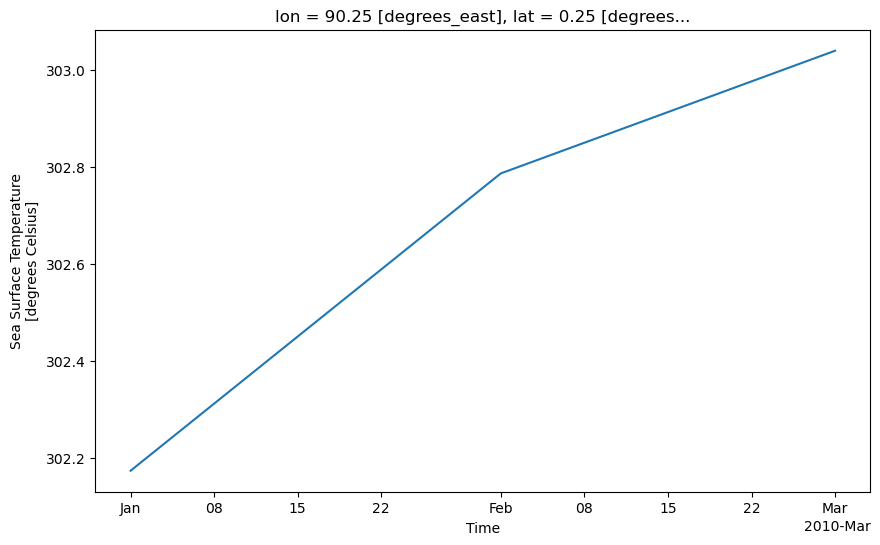

In [18]:
time_slice.sel(lat=0.0, lon=90.0, method="nearest").plot(figsize=(10, 6))
plt.show()

## Exercise 3: Performing Arithmetic Operations

1. **Compute the mean SST** over the entire time range (2010-2015) to obtain the average sea surface temperature for each spatial location.
2. **Calculate the temperature anomalies** by subtracting the computed mean from the original SST values. This helps understand how SST deviates from the mean during the time period.
3. **Plot both the mean SST and the anomalies** on separate plots to visualize spatial temperature patterns and deviations. You can select a specific time to display the anomalies.

This exercise introduces arithmetic operations on the dataset, focusing on the concept of temperature anomalies.

In [19]:
mean_sst = sst.mean(dim="time")
mean_sst

<xarray.DataArray 'sst' (lat: 360, lon: 720)> Size: 2MB
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [271.55418184, 271.5546396 , 271.5551512 , ..., 271.55292977,
        271.55331887, 271.55374951],
       [271.56819195, 271.56842762, 271.56883197, ..., 271.56735992,
        271.56760958, 271.56787321],
       [271.56199985, 271.56201384, 271.56199985, ..., 271.56194517,
        271.56195916, 271.56197272]], shape=(360, 720))
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75

In [20]:
anomalies = sst - mean_sst
anomalies

<xarray.DataArray 'sst' (time: 72, lat: 360, lon: 720)> Size: 149MB
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.11616304, -0.11463716, -0.11514876, ..., -0.12290658,
         -0.12231912, -0.12174267],
        [-0.09819073, -0.09842639, -0.09883075, ..., -0.0973587 ,
         -0.09760835, -0.09787199],
        [-0.10100132, -0.1010153 , -0.10100132, ..., -0.10094664,
         -0.10096063, -0.10097419]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [-0.09016207, -0.08961275, -0.08914778, ..., -0.09391488,
         -0.0932969 , -0.09174389],
        [-0.08918805, -0.08942371, -0.08982807, ..., -0.08933258,
         -0.08958223, -0.08984587],
        [-0.09297519, -0.09298918, -0.09297519, ..., -0.09292052,
         -0.0929345 , -0.09294807]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.1141794 , -0.11463716, -0.11414168, ..., -0.11591805,
         -0.11530007, -0.11472363],
        [-0.11119122, -0.11142688, -0.11183124, ..., -0.11133575,
         -0.11158541, -0.11087248],
        [-0.10100132, -0.1010153 , -0.10100132, ..., -0.10094664,
         -0.10096063, -0.10097419]]], shape=(72, 360, 720))
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 576B 2010-01-01 2010-02-01 ... 2015-12-01

Text(0.5, 1.0, 'Mean Sea Surface Temperature')

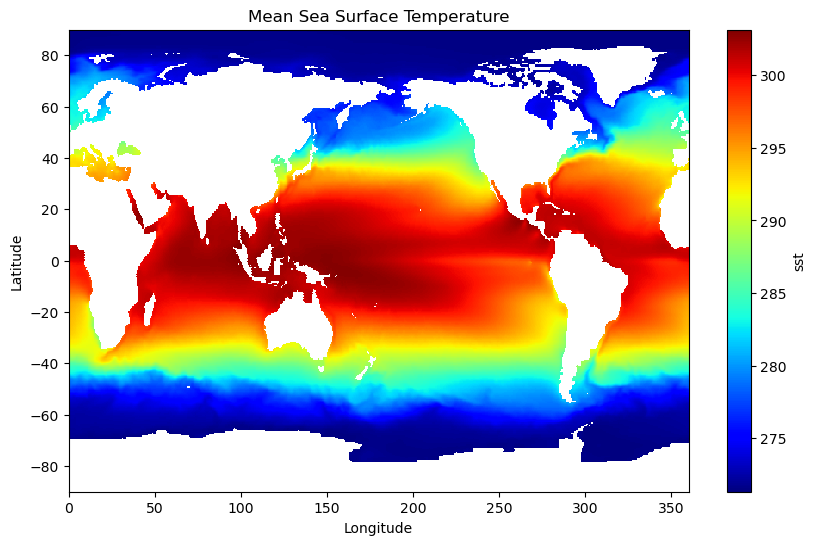

In [21]:
mean_sst.plot(cmap="jet", figsize=(10, 6))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Mean Sea Surface Temperature")

In [22]:
anomalies_ploy = anomalies.sel(time="2010-07-01")

Text(0.5, 1.0, 'Sea Surface Temperature Anomalies on July 1, 2010')

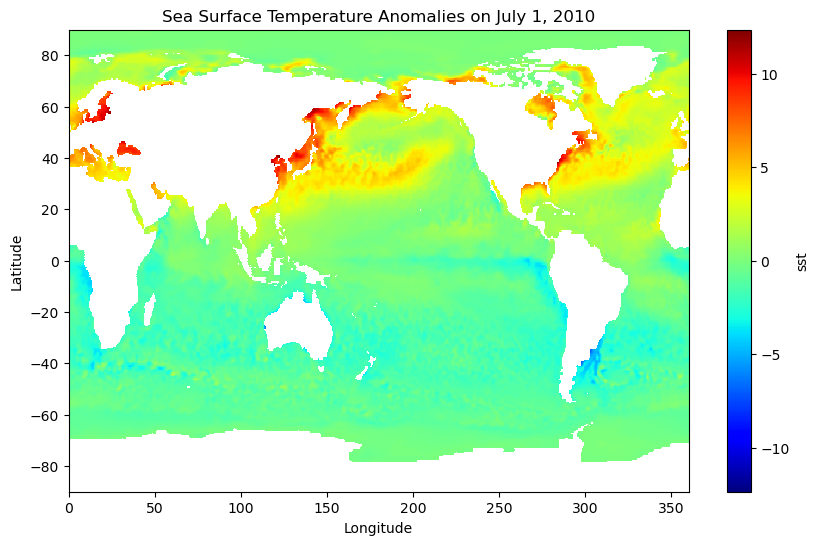

In [23]:
anomalies_ploy.plot(cmap="jet", figsize=(10, 6))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Sea Surface Temperature Anomalies on July 1, 2010")

## Exercise 4: GroupBy and Resampling

1. **Use `groupby` to calculate the seasonal mean SST**. Group the data by season (`DJF`, `MAM`, `JJA`, and `SON`) and compute the average SST for each season.
2. **Resample the dataset to compute the monthly mean SST**. This aggregates the data on a monthly basis.
3. **Plot the seasonal mean SST and the monthly mean SST** to visualize how sea surface temperature varies by season and by month.

This exercise demonstrates how to group and resample time-series data, commonly used in climate data analysis.

In [24]:
season_mean = sst.groupby("time.season").mean()
season_mean

<xarray.DataArray 'sst' (season: 4, lat: 360, lon: 720)> Size: 8MB
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [271.445794  , 271.44640096, 271.44684516, ..., 271.44434611,
         271.44468011, 271.44518195],
        [271.46728516, 271.467453  , 271.46762085, ..., 271.46678501,
         271.46695285, 271.46700711],
        [271.46040175, 271.46040175, 271.46040175, ..., 271.46034749,
         271.46034749, 271.46040175]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
...
        [271.44701301, 271.44734701, 271.44762505, ..., 271.44656881,
         271.44679091, 271.44695706],
        [271.4673445 , 271.46756321, 271.46789551, ..., 271.46673414,
         271.46701219, 271.46723429],
        [271.46212599, 271.46212599, 271.46212599, ..., 271.46207004,
         271.46207004, 271.46207004]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [271.65257094, 271.65346273, 271.65445455, ..., 271.6497345 ,
         271.65062459, 271.6515113 ],
        [271.65912204, 271.65940179, 271.66018168, ..., 271.65751648,
         271.65795729, 271.65851169],
        [271.6340705 , 271.6340705 , 271.6340705 , ..., 271.63401625,
         271.63401625, 271.63401625]]], shape=(4, 360, 720))
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * season   (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    long_name:      Sea Surface Temperature
    units:          degrees Celsius
    standard_name:  sea_surface_temperature
    valid_range:    [-2. 35.]

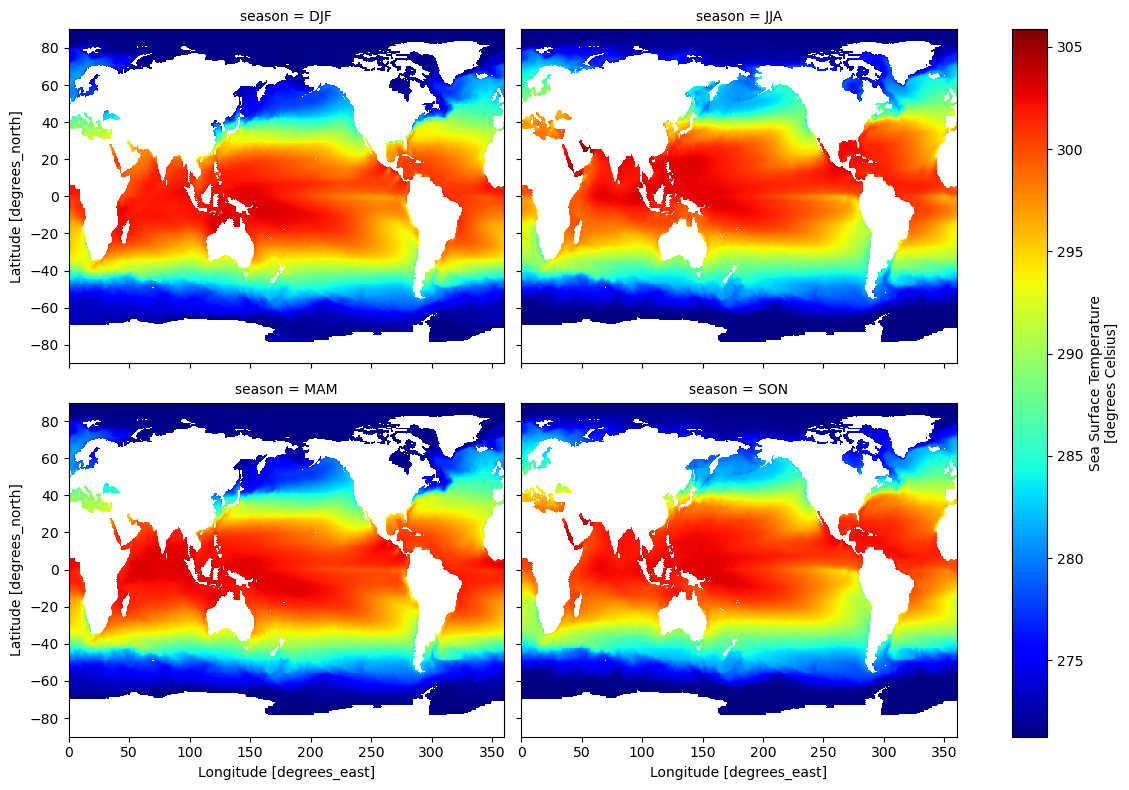

In [25]:
season_mean.plot(col="season", col_wrap=2, cmap="jet", figsize=(12, 8))

#### Resampling method

In [26]:
monthly_mean = sst.resample(time="1M").mean()
monthly_mean

<xarray.DataArray 'sst' (time: 72, lat: 360, lon: 720)> Size: 149MB
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [271.4380188 , 271.44000244, 271.44000244, ..., 271.43002319,
         271.43099976, 271.43200684],
        [271.47000122, 271.47000122, 271.47000122, ..., 271.47000122,
         271.47000122, 271.47000122],
        [271.46099854, 271.46099854, 271.46099854, ..., 271.46099854,
         271.46099854, 271.46099854]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
...
        [271.46401978, 271.46502686, 271.46600342, ..., 271.45901489,
         271.46002197, 271.46200562],
        [271.47900391, 271.47900391, 271.47900391, ..., 271.47802734,
         271.47802734, 271.47802734],
        [271.46902466, 271.46902466, 271.46902466, ..., 271.46902466,
         271.46902466, 271.46902466]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [271.44000244, 271.44000244, 271.44100952, ..., 271.43701172,
         271.4380188 , 271.43902588],
        [271.45700073, 271.45700073, 271.45700073, ..., 271.45602417,
         271.45602417, 271.45700073],
        [271.46099854, 271.46099854, 271.46099854, ..., 271.46099854,
         271.46099854, 271.46099854]]], shape=(72, 360, 720))
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 576B 2010-01-31 2010-02-28 ... 2015-12-31
Attributes:
    long_name:      Sea Surface Temperature
    units:          degrees Celsius
    standard_name:  sea_surface_temperature
    valid_range:    [-2. 35.]

In [27]:
monthly_mean_average = monthly_mean.groupby("time.month").mean()
monthly_mean_average

<xarray.DataArray 'sst' (month: 12, lat: 360, lon: 720)> Size: 25MB
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [271.44484965, 271.44584147, 271.44600932, ..., 271.44284566,
         271.44317627, 271.44384766],
        [271.46617635, 271.4663442 , 271.46667989, ..., 271.46584066,
         271.46584066, 271.46584066],
        [271.46018473, 271.46018473, 271.46018473, ..., 271.46018473,
         271.46018473, 271.46018473]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
...
        [271.46017965, 271.46101888, 271.46151225, ..., 271.45834859,
         271.45900981, 271.45950826],
        [271.48001099, 271.48001099, 271.48034668, ..., 271.47901917,
         271.47918193, 271.47968038],
        [271.46651713, 271.46651713, 271.46651713, ..., 271.46651713,
         271.46651713, 271.46651713]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [271.44785055, 271.44801331, 271.44834391, ..., 271.44618225,
         271.44651794, 271.44718424],
        [271.46983846, 271.47000631, 271.47017415, ..., 271.46934001,
         271.46950785, 271.46967061],
        [271.46100362, 271.46100362, 271.46100362, ..., 271.46084086,
         271.46084086, 271.46100362]]], shape=(12, 360, 720))
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:      Sea Surface Temperature
    units:          degrees Celsius
    standard_name:  sea_surface_temperature
    valid_range:    [-2. 35.]

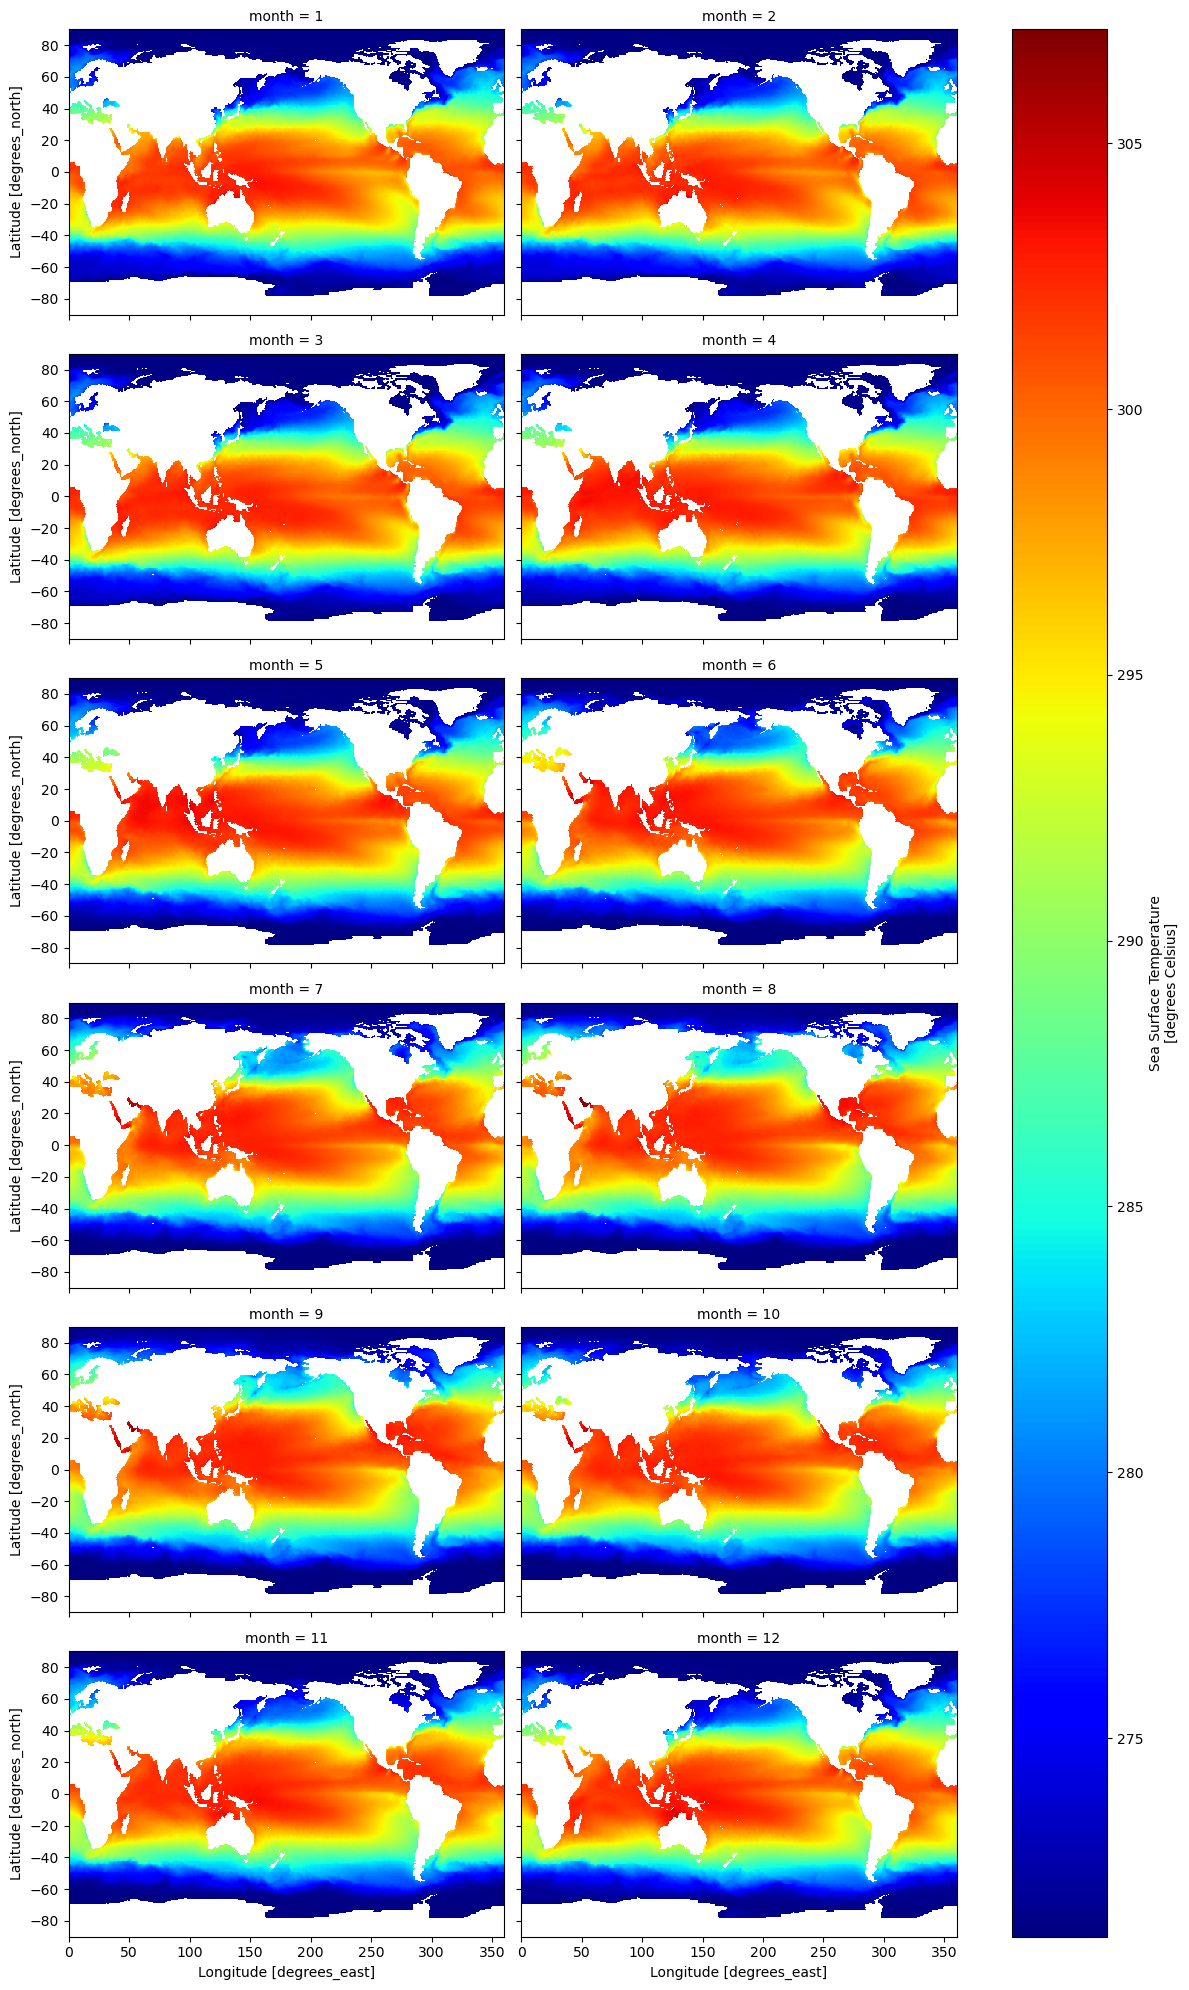

In [28]:
monthly_mean_average.plot(col="month", col_wrap=2, cmap="jet", figsize=(12, 20))

#### Rolling windows method

In [29]:
sst_rolling = sst.rolling(time=12, center=True).mean()
sst_rolling

<xarray.DataArray 'sst' (time: 72, lat: 360, lon: 720)> Size: 149MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], shape=(72, 360, 720))
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 576B 2010-01-01 2010-02-01 ... 2015-12-01
Attributes:
    long_name:      Sea Surface Temperature
    units:          degrees Celsius
    standard_name:  sea_surface_temperature
    valid_range:    [-2. 35.]

In [30]:
average_monthly_sst = sst_rolling.groupby("time.month").mean()
average_monthly_sst

<xarray.DataArray 'sst' (month: 12, lat: 360, lon: 720)> Size: 25MB
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [271.56151479, 271.56196442, 271.56237895, ..., 271.5604126 ,
         271.5607961 , 271.56121267],
        [271.57427928, 271.57456207, 271.57496338, ..., 271.57342885,
         271.57369537, 271.5739624 ],
        [271.56776377, 271.56778056, 271.56776377, ..., 271.56771495,
         271.56771495, 271.56773122]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
...
        [271.56098124, 271.56141408, 271.56182861, ..., 271.55991262,
         271.56029612, 271.5606959 ],
        [271.57447866, 271.57476145, 271.57517955, ..., 271.57356211,
         271.57384542, 271.57414551],
        [271.56771393, 271.56773071, 271.56771393, ..., 271.5676651 ,
         271.5676651 , 271.56768138]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [271.56104787, 271.5614975 , 271.56191203, ..., 271.55996246,
         271.56034597, 271.56076253],
        [271.57429555, 271.57457835, 271.57499644, ..., 271.57339528,
         271.57367859, 271.5739624 ],
        [271.56773071, 271.5677475 , 271.56773071, ..., 271.56768188,
         271.56768188, 271.56769816]]], shape=(12, 360, 720))
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:      Sea Surface Temperature
    units:          degrees Celsius
    standard_name:  sea_surface_temperature
    valid_range:    [-2. 35.]

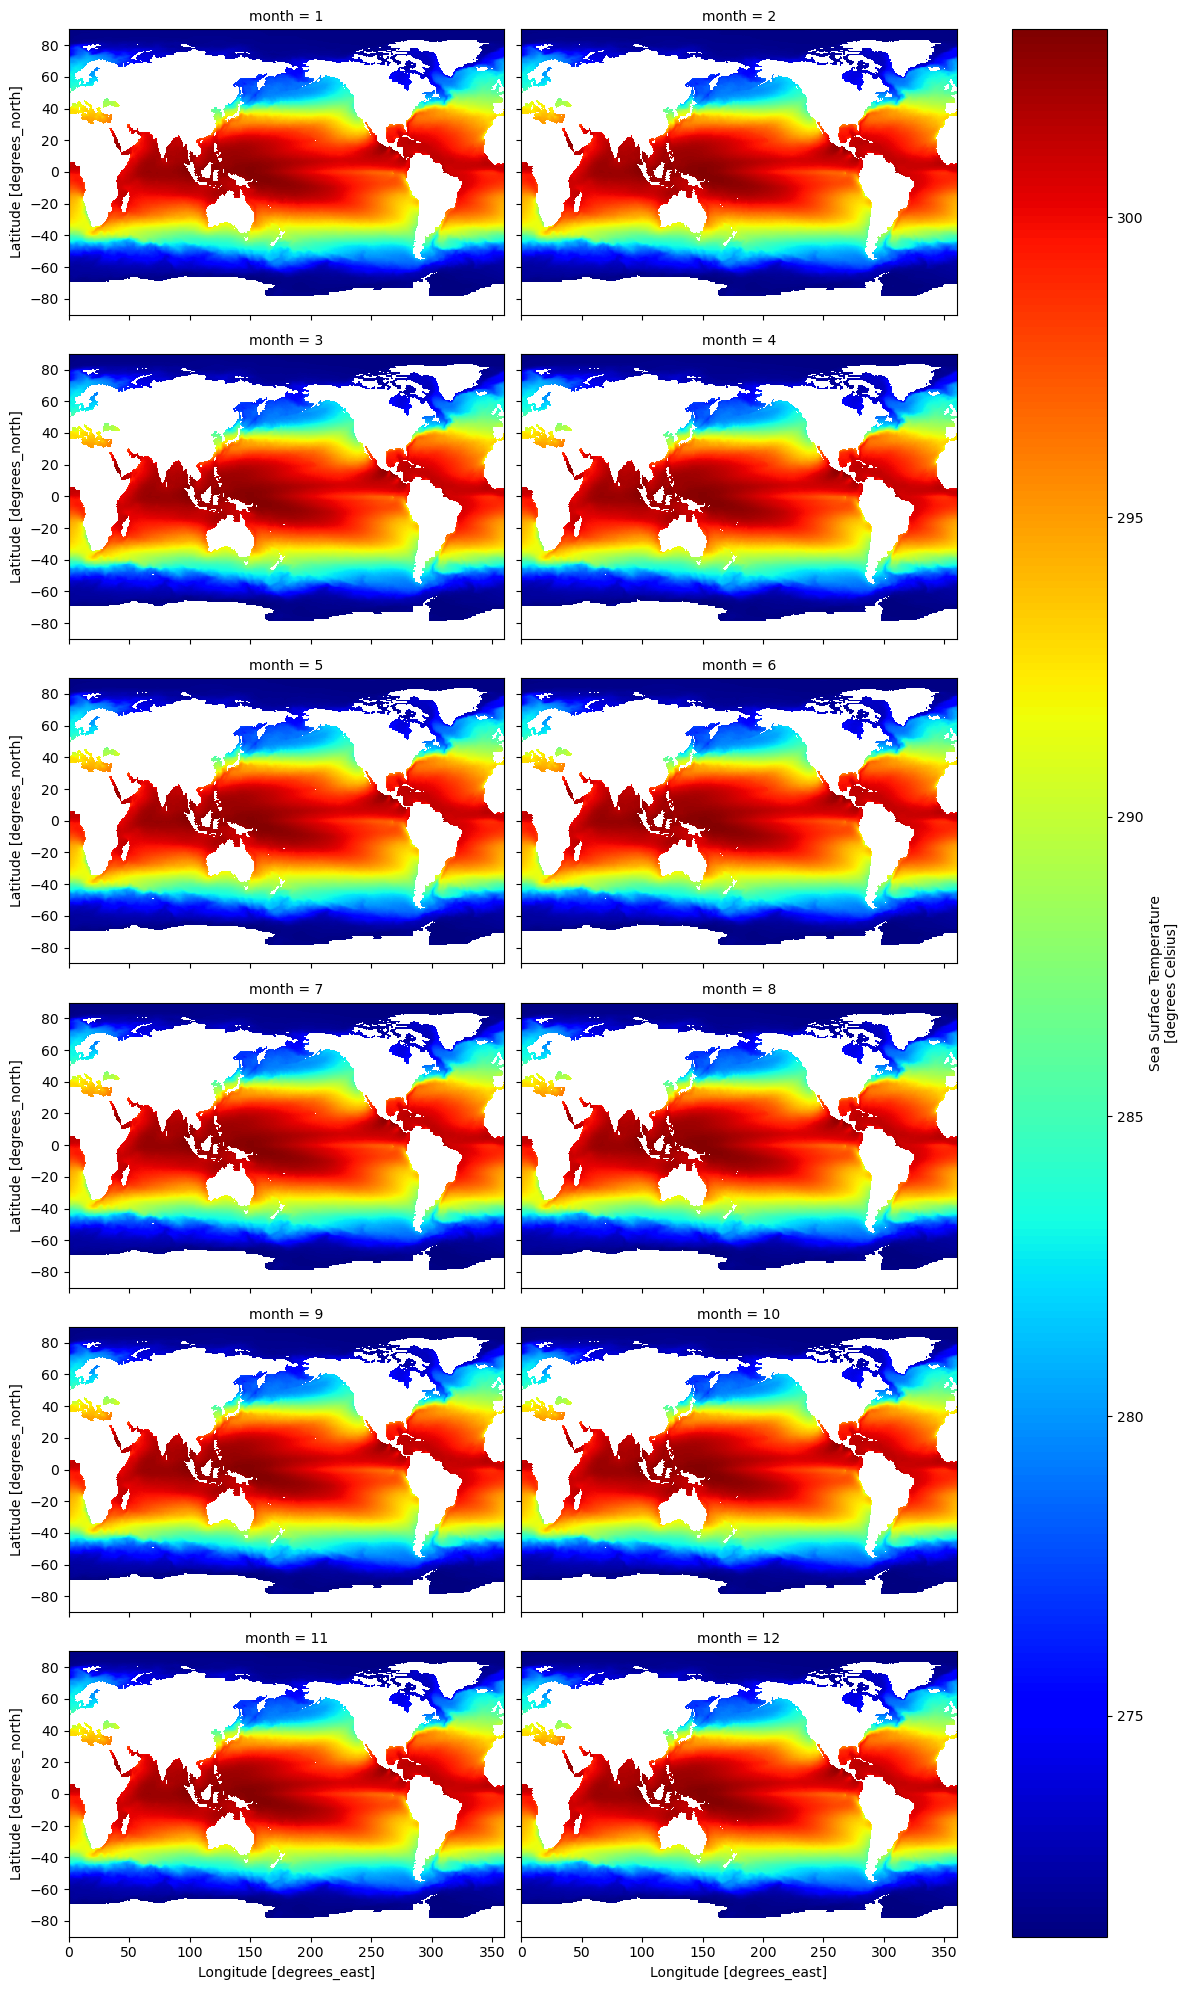

In [31]:
average_monthly_sst.plot(col="month", col_wrap=2, cmap="jet", figsize=(12, 20))

## Exercise 5: Writing Data to NetCDF

1. **Select the SST anomalies** calculated in Exercise 3 for further analysis and export.
2. **Convert the `sst` variable to `float32`** to optimize file size before writing the data to a NetCDF file.
3. **Write the anomalies data** to a new NetCDF file named `sst_anomalies.nc` for storage and future use.
4. **Load the saved NetCDF file** back into memory and print its contents to verify the saved data.

This exercise teaches how to export processed geospatial data to NetCDF, a widely-used file format in climate data analysis.

In [32]:
anomalies = anomalies.astype(np.float32)

In [33]:
anomalies.to_netcdf("sea_anomalies.nc")

In [34]:
anomalies = xr.open_dataset("sea_anomalies.nc")
anomalies

<xarray.Dataset> Size: 75MB
Dimensions:  (time: 72, lat: 360, lon: 720)
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 576B 2010-01-01 2010-02-01 ... 2015-12-01
Data variables:
    sst      (time, lat, lon) float32 75MB ...

In [35]:
ann = xr.open_dataarray("sea_anomalies.nc")
ann

<xarray.DataArray 'sst' (time: 72, lat: 360, lon: 720)> Size: 75MB
[18662400 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 576B 2010-01-01 2010-02-01 ... 2015-12-01

## Exercise 6: Load and Inspect a Raster Dataset

1. Use `rioxarray` to load the GeoTIFF raster file at https://github.com/opengeos/datasets/releases/download/raster/Libya-2023-09-13.tif.
2. Inspect the dataset by printing its dimensions, coordinates, and attributes.
3. Check and print the CRS and affine transformation of the dataset.

In [1]:
import rioxarray
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
url = (
    "https://github.com/opengeos/datasets/releases/download/raster/Libya-2023-09-13.tif"
)
data = rioxarray.open_rasterio(url)
data

<xarray.DataArray (band: 3, y: 17408, x: 17408)> Size: 909MB
[909115392 values with dtype=uint8]
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 139kB 6.498e+05 6.498e+05 ... 6.552e+05 6.552e+05
  * y            (y) float64 139kB 3.63e+06 3.63e+06 ... 3.625e+06 3.625e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [3]:
data.dims

('band', 'y', 'x')

In [4]:
data.coords

Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 139kB 6.498e+05 6.498e+05 ... 6.552e+05 6.552e+05
  * y            (y) float64 139kB 3.63e+06 3.63e+06 ... 3.625e+06 3.625e+06
    spatial_ref  int64 8B 0

In [5]:
data.attrs

{'AREA_OR_POINT': 'Area', 'scale_factor': 1.0, 'add_offset': 0.0}

In [6]:
# crs
data.rio.crs

CRS.from_wkt('PROJCS["WGS 84 / UTM zone 34N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",21],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32634"]]')

In [7]:
# check the real world coordinate reference system rather than the pixel coordinate reference system
data.rio.transform()

Affine(0.30517578125, 0.0, 649843.75,
       0.0, -0.30517578125, 3630156.25)

## Exercise 7: Reproject the Raster to a New CRS

1. Reproject the loaded raster dataset from its original CRS to EPSG:4326 (WGS84).
2. Print the new CRS and check the dimensions and coordinates of the reprojected data.
3. Plot the original and reprojected datasets for comparison.

In [8]:
data_reprojected = data.rio.reproject("EPSG:4326")
data_reprojected.rio.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [9]:
data_reprojected.dims

('band', 'y', 'x')

In [10]:
data_reprojected.coords

Coordinates:
  * x            (x) float64 153kB 22.6 22.6 22.6 22.6 ... 22.66 22.66 22.66
  * y            (y) float64 129kB 32.8 32.8 32.8 32.8 ... 32.75 32.75 32.75
  * band         (band) int64 24B 1 2 3
    spatial_ref  int64 8B 0

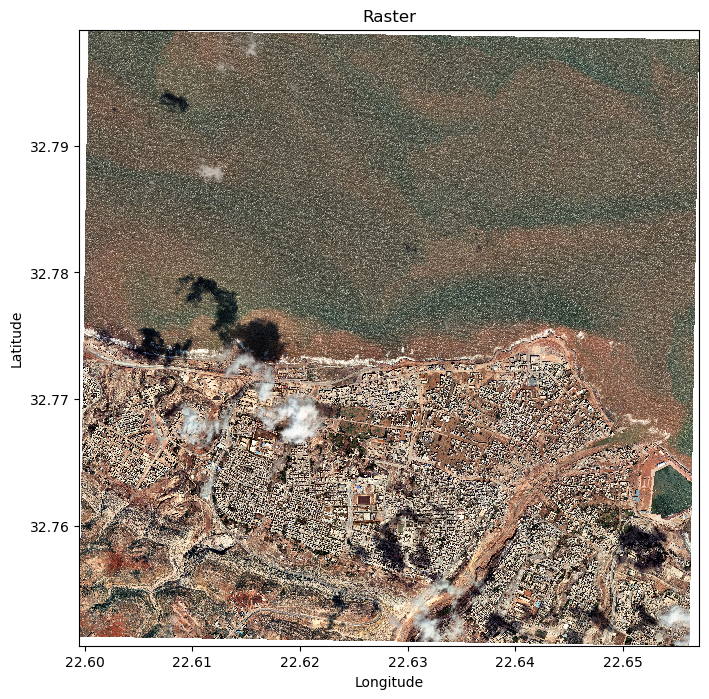

In [11]:
plt.figure(figsize=(8, 8))
data_reprojected.sel(band=[1, 2, 3]).plot.imshow()
plt.title("Raster")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

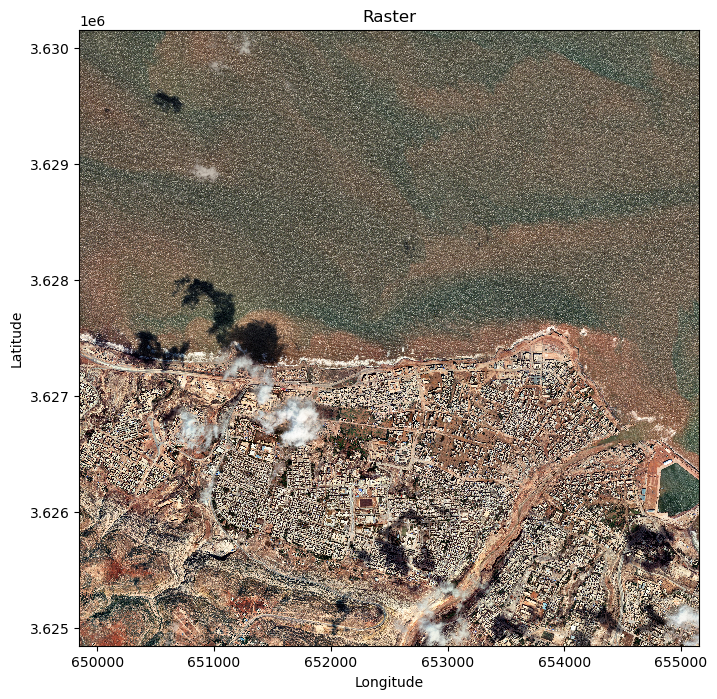

In [12]:
plt.figure(figsize=(8, 8))
data.sel(band=[1, 2, 3]).plot.imshow()
plt.title("Raster")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Exercise 8: Clip the Raster Using a Bounding Box

1. Define a bounding box (e.g., `xmin`, `ymin`, `xmax`, `ymax`) that covers the land area of Libya.
2. Clip the raster dataset using this bounding box.
3. Plot the clipped data to visualize the result.

In [13]:
bbox = [22.62, 32.76, 22.64, 32.78]
clipped_data = data_reprojected.rio.clip_box(*bbox)
clipped_data

<xarray.DataArray (band: 3, y: 6650, x: 6651)> Size: 133MB
array([[[ 72,  81,  84, ..., 139, 143, 110],
        [110, 135, 134, ..., 114,  94,  97],
        [129, 182, 175, ...,  93,  60,  96],
        ...,
        [135,  85,  54, ..., 137, 161, 195],
        [163, 125,  91, ..., 185, 191, 185],
        [159, 161, 147, ..., 190, 184, 176]],

       [[ 68,  77,  80, ..., 131, 135, 102],
        [106, 131, 130, ..., 106,  86,  89],
        [125, 178, 171, ...,  85,  52,  88],
        ...,
        [126,  74,  43, ...,  76,  99, 138],
        [154, 114,  80, ..., 120, 125, 124],
        [149, 150, 136, ..., 122, 116, 111]],

       [[ 56,  65,  68, ..., 118, 122,  89],
        [ 94, 119, 118, ...,  93,  73,  76],
        [113, 166, 160, ...,  72,  39,  75],
        ...,
        [117,  68,  39, ...,  58,  84, 119],
        [145, 108,  74, ..., 102, 109, 105],
        [140, 144, 130, ..., 103,  97,  91]]],
      shape=(3, 6650, 6651), dtype=uint8)
Coordinates:
  * x            (x) float64 53kB 22.62 22.62 22.62 22.62 ... 22.64 22.64 22.64
  * y            (y) float64 53kB 32.78 32.78 32.78 32.78 ... 32.76 32.76 32.76
  * band         (band) int64 24B 1 2 3
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    _FillValue:     255

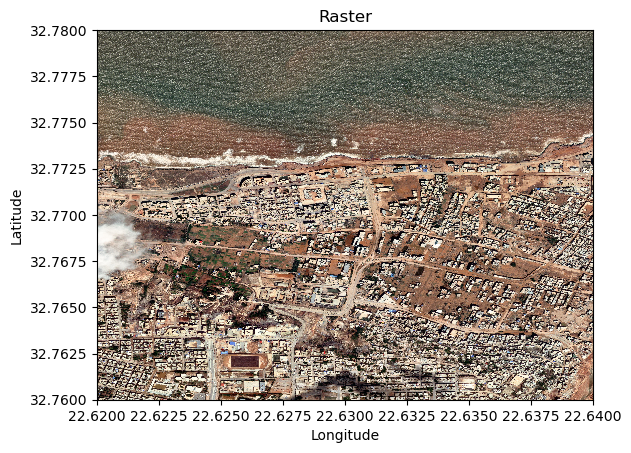

In [14]:
plt.figure()
clipped_data.sel(band=[1, 2, 3]).plot.imshow()
plt.title("Raster")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Exercise 9: Mask the Raster Using a Vector Dataset

1. Load the GeoJSON file at https://github.com/opengeos/datasets/releases/download/raster/Derna_Libya.geojson using `geopandas`.
2. Use the GeoJSON to mask the reprojected raster dataset, keeping only the data within the GeoJSON boundaries.
3. Plot the masked raster data.

In [15]:
import geopandas as gpd

In [16]:
geojson_path = (
    "https://github.com/opengeos/datasets/releases/download/raster/Derna_Libya.geojson"
)
gdf = gpd.read_file(geojson_path)

In [17]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
clipped_data_by_bound = data_reprojected.rio.clip(gdf.geometry, gdf.crs)

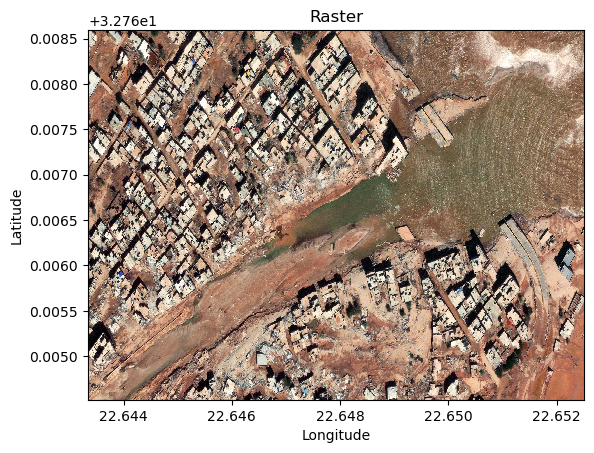

In [19]:
plt.figure()
clipped_data_by_bound.sel(band=[1, 2, 3]).plot.imshow()
plt.title("Raster")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Exercise 10: Resample the Raster to a Different Resolution

1. Resample the raster dataset to a 3m resolution, using an average resampling method.
2. Check the new dimensions and coordinates after resampling.
3. Save the resampled raster dataset as a new GeoTIFF file.

In [20]:
resampled_data = data.rio.reproject(data.rio.crs, resolution=3)

In [24]:
data.shape

(3, 17408, 17408)

In [23]:
resampled_data.shape

(3, 1771, 1771)

In [21]:
resampled_data.dims

('band', 'y', 'x')

In [22]:
resampled_data.coords

Coordinates:
  * x            (x) float64 14kB 6.498e+05 6.498e+05 ... 6.552e+05 6.552e+05
  * y            (y) float64 14kB 3.63e+06 3.63e+06 ... 3.625e+06 3.625e+06
  * band         (band) int64 24B 1 2 3
    spatial_ref  int64 8B 0

In [27]:
resampled_data.rio.to_raster("output_file/output_raster.tif")